## Previsão de Score de Crédito com Regressão Linear

Modelo de Machine Learning Preditivo com o Algorítimo de Regressão Linear, realização da analise exploratória mais o tratamento de Dados, em conjunto com
técnicas de OneHotEncoding, Engenharia de Atributos e Normalização de Dados.
*  Base de Dados: https://www.kaggle.com/datasets/prasy46/credit-score-prediction

Autor: [Luan Alysson de Souza](https://www.linkedin.com/in/luanalyssondesouza/)



### Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Carregamento, Análise Exploratória e Tratamento

In [ ]:
dados = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ3zOkYEPV3aKzvEW7ljOv0MLcotK4eXmqOUErvMVUUE_X_gW3XDi2QyWIFKds3KQ/pub?output=csv')

In [ ]:
dados.head(5)

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,29
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34


In [ ]:
dados.info() # necessidade de deletar colunas irrelevantes, transformar as colunas object em int com o OneHotEncoding, e as demais em numérica.

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  object 
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  object 
 3   ESTADO_CIVIL                10474 non-null  object 
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  object 
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  object 
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  object 
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

In [ ]:
dados.shape

(10474, 16)

In [ ]:
dados.isna().sum() # Verificar se há dados faltantes

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [ ]:
dados.drop('CODIGO_CLIENTE', axis =1,inplace = True) # Axis = eixo (coluna)

KeyError: "['CODIGO_CLIENTE'] not found in axis"

In [ ]:
dados.groupby(['ULTIMO_SALARIO']).size()

,0
ULTIMO_SALARIO,
1800.000000,846
2200.000000,791
3100.000000,792
3900.000000,792
4500.000000,468
4800.000000,792
5300.000000,522
6100.000000,522
6800.000000,611


In [ ]:
dados.loc[dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE


In [ ]:
dados.replace('SEM DADOS', np.nan, inplace = True) #coloca em NAN o dado faltante

In [ ]:
dados['ULTIMO_SALARIO'] = dados['ULTIMO_SALARIO'].astype(float) #transforma em float

In [ ]:
dados.isna().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [ ]:
dados['ULTIMO_SALARIO'] = dados['ULTIMO_SALARIO'].fillna(dados['ULTIMO_SALARIO'].mean()) #preenche os dados faltantes com a média

In [ ]:
dados.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  object 
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  object 
 3   ESTADO_CIVIL                10474 non-null  object 
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  object 
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  object 
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  object 
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

In [ ]:
dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000
mean,41.053084,1.115142,0.846954,238420.851633,641.359557,43.075520,8287.097716,0.936319,40994.844377,51.135192
std,13.879267,0.975061,0.957398,265845.780270,1296.071635,40.853766,5826.355720,0.806645,47407.771248,27.325643
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,29.000000
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.000000
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,73.000000
max,65.000000,3.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [ ]:
# Verifica os Outliers com um arrange
variaveis_numericas = []
for i in dados.columns[0:17].tolist():
    if dados.dtypes[i] == 'int64' or dados.dtypes[i] == 'float64':
        print(i,':', dados.dtypes[i])
        variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : int64


In [ ]:
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

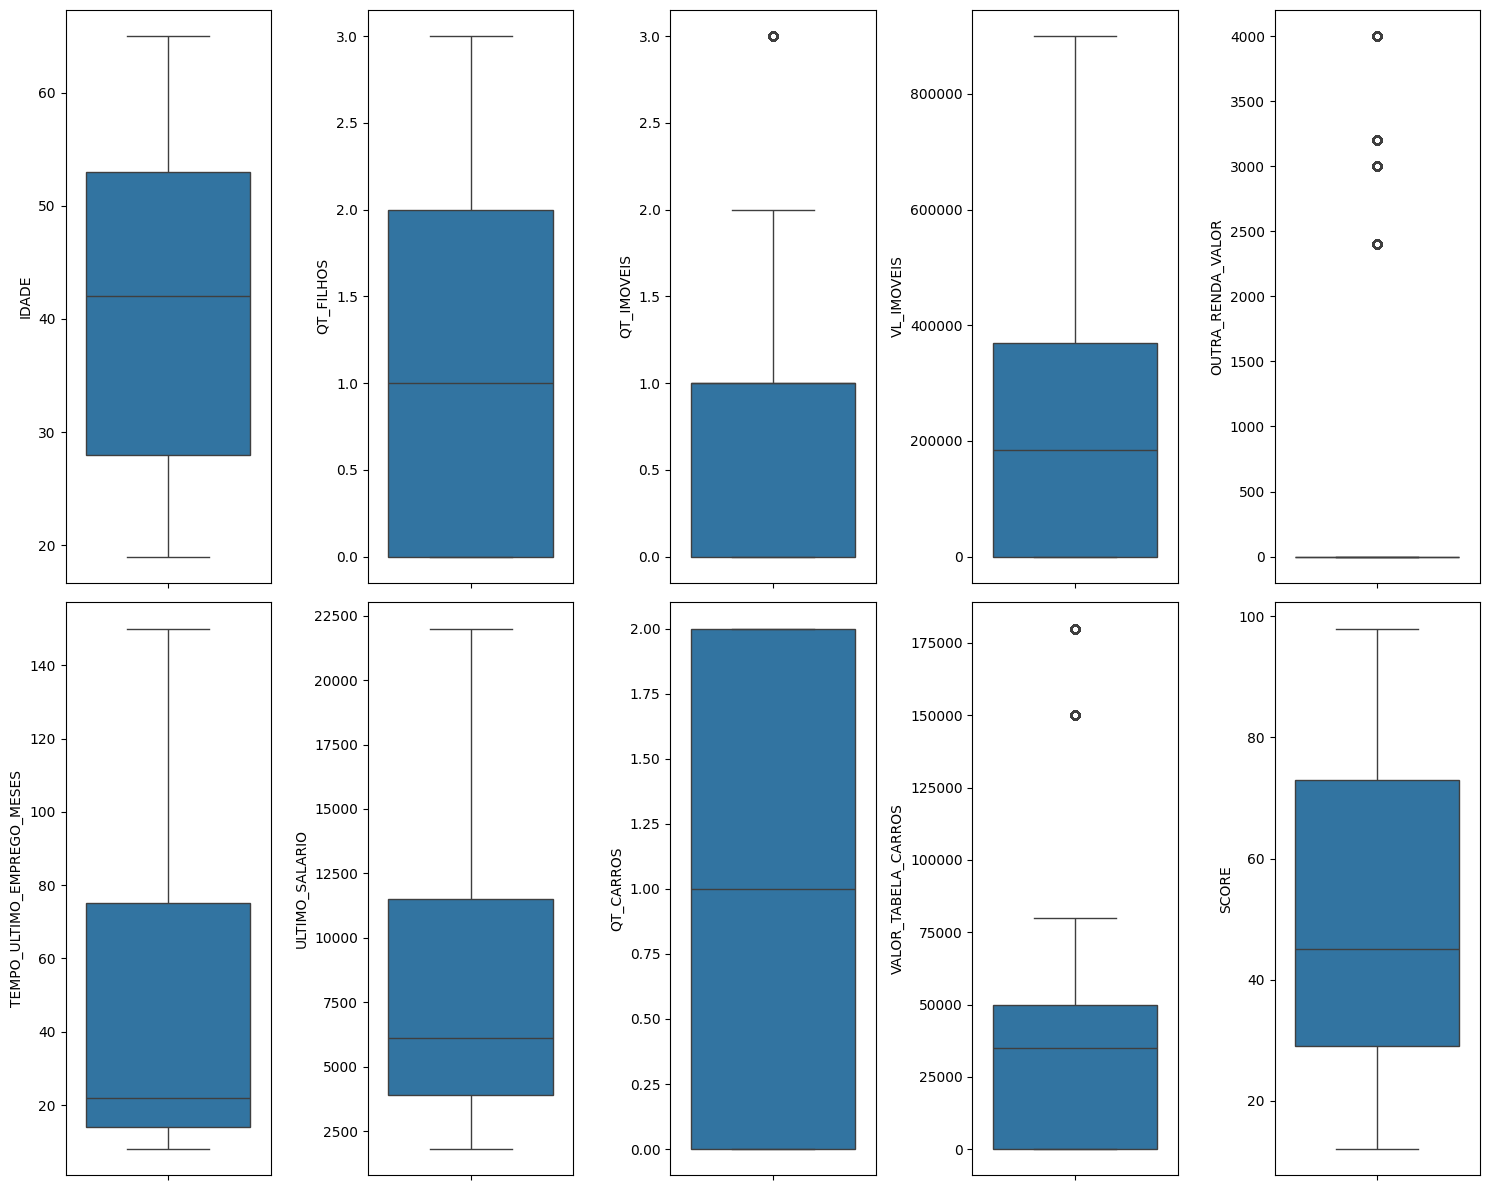

In [ ]:
# Exibir gráfico pafa facilitar a analise
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2,5)

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = dados, y=i, ax=axes[linha, coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0

In [ ]:
# Ver como irá ser tratados os outliers
dados.loc[dados['QT_FILHOS']> 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE


In [ ]:
# Deletando esses maires registros
dados.drop(dados.loc[dados['QT_FILHOS']> 4].index, inplace = True)

In [ ]:
# Avaliando as demais
dados.groupby(['OUTRA_RENDA_VALOR']).size()

,0
OUTRA_RENDA_VALOR,
0,8350
2400,468
3000,612
3200,522
4000,522


In [ ]:
dados.groupby(['VALOR_TABELA_CARROS']).size()

,0
VALOR_TABELA_CARROS,
0,3762
28000,468
30000,791
35000,792
40000,792
48000,522
50000,1314
70000,521
80000,522


In [ ]:
dados.groupby(['QT_IMOVEIS']).size()

,0
QT_IMOVEIS,
0,4680
1,3761
2,989
3,1044


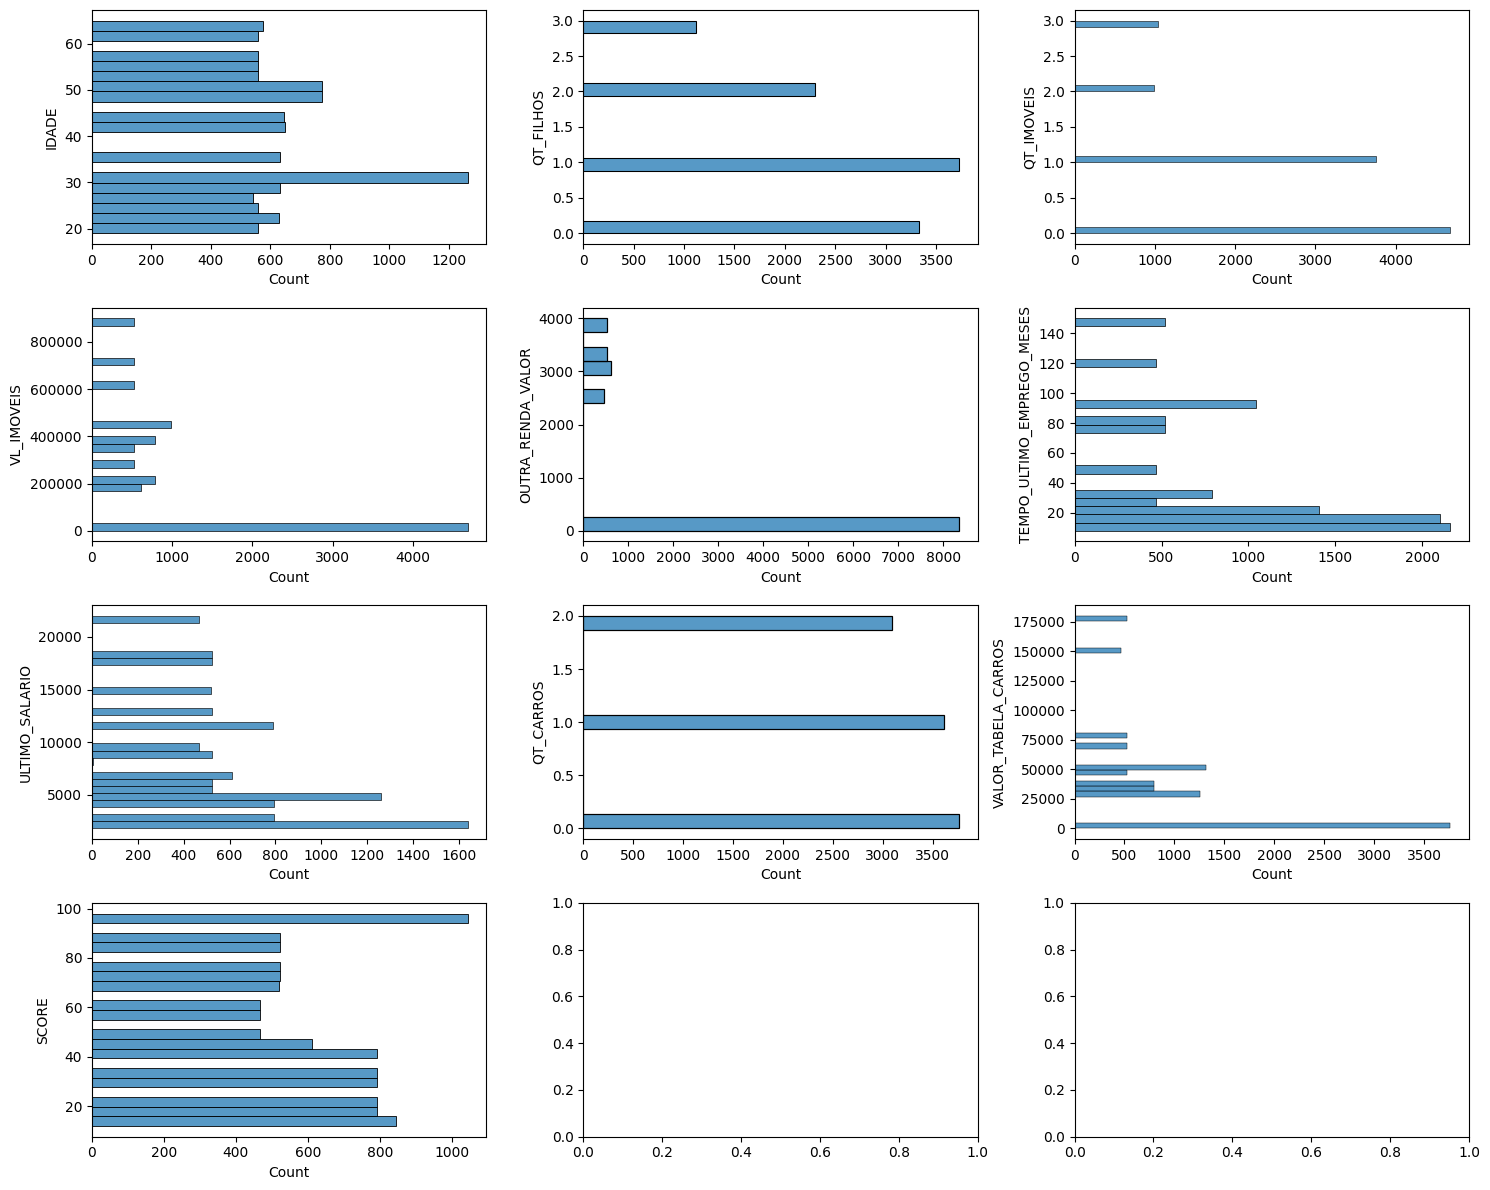

In [ ]:
# Exibir gráfico pafa facilitar a analise
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4,3)

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = dados, y=i, ax=axes[linha, coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

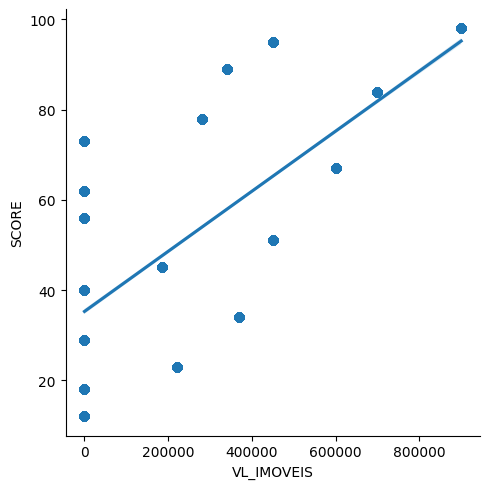

In [ ]:
sns.lmplot(x = "VL_IMOVEIS", y = "SCORE", data = dados);

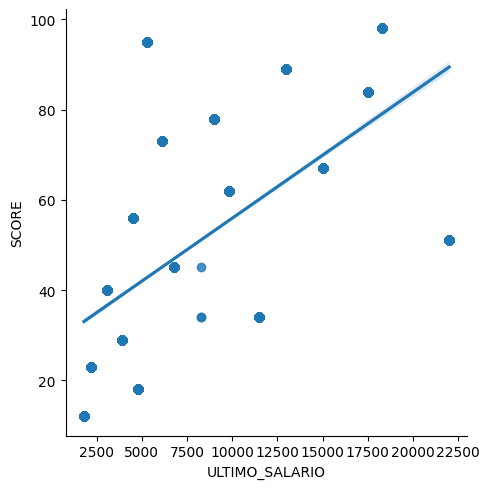

In [ ]:
sns.lmplot(x = "ULTIMO_SALARIO", y = "SCORE", data = dados);

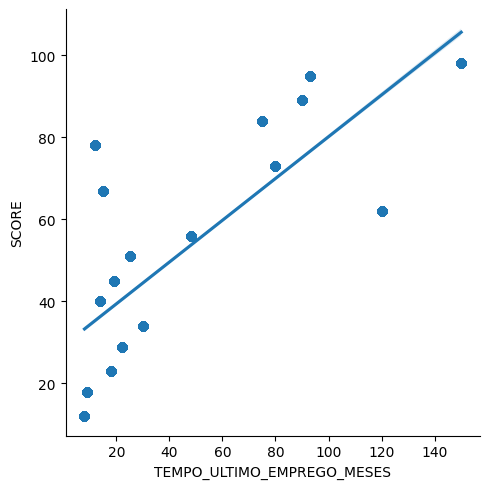

In [ ]:
sns.lmplot(x = "TEMPO_ULTIMO_EMPREGO_MESES", y = "SCORE", data = dados);

In [ ]:
print('Menor Idade:', dados['IDADE'].min())
print('Menor Idade:', dados['IDADE'].max())

Menor Idade: 19
Menor Idade: 65


In [ ]:
idade_bins = [0,30,40,50,60]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "51 a 60"]
dados['IDADE_CATEGORIA'] = pd.cut(dados['IDADE'], bins = idade_bins, labels = idade_categoria)

dados["Faixa_ETARIA"] = pd.cut(dados["IDADE"], bins = idade_bins, labels = idade_categoria)
dados["Faixa_ETARIA"].value_counts()

,count
Faixa_ETARIA,
Até 30,3552
51 a 60,2448
41 a 50,2070
31 a 40,1270


In [ ]:
variaveis_categoricas = []
for i in dados.columns[0:48].tolist():
        if dados.dtypes[i] == 'object' or dados.dtypes[i] == 'category':
            print(i, ':' , dados.dtypes[i])
            variaveis_categoricas.append(i)

IDADE_CATEGORIA : category


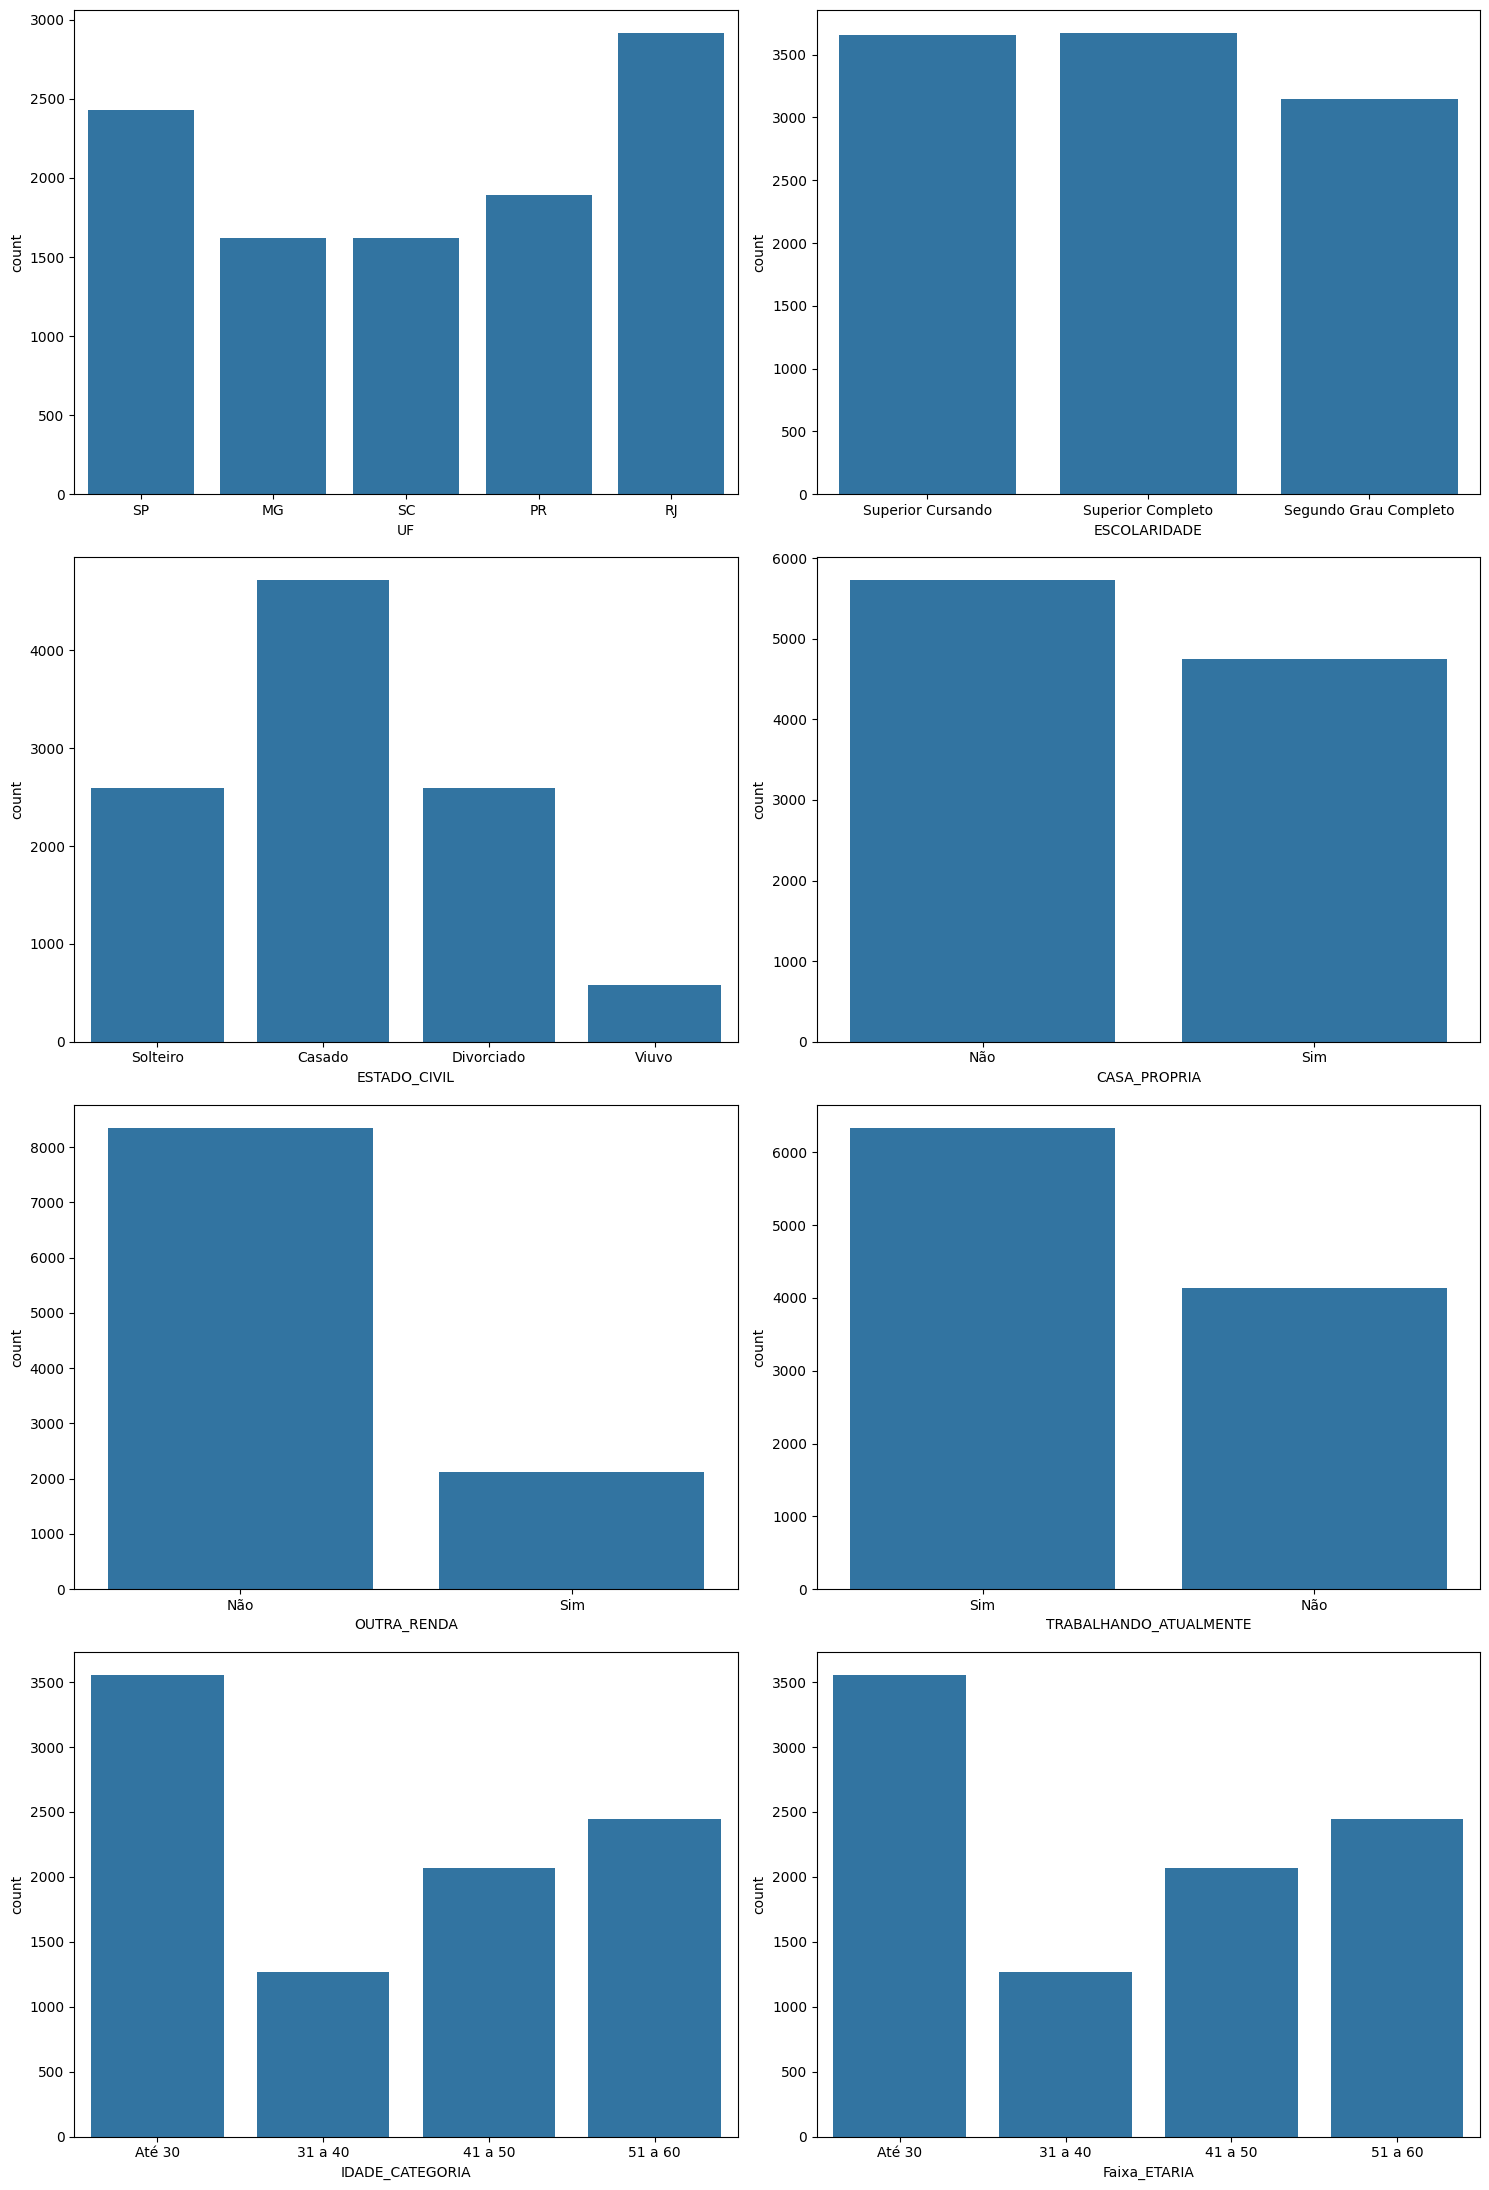

In [ ]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_categoricas:
    sns.countplot(data = dados, x=i, ax=axes[linha][coluna])

    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

## Pré Processamento dos Dados
    

In [ ]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
dados['Faixa_ETARIA'] = lb.fit_transform(dados['Faixa_ETARIA'])
dados['OUTRA_RENDA'] = lb.fit_transform(dados['OUTRA_RENDA'])
dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(dados['TRABALHANDO_ATUALMENTE'])
dados['ESTADO_CIVIL'] = lb.fit_transform(dados['ESTADO_CIVIL'])
dados['CASA_PROPRIA'] = lb.fit_transform(dados['CASA_PROPRIA'])
dados['ESCOLARIDADE'] = lb.fit_transform(dados['ESCOLARIDADE'])
dados['UF'] = lb.fit_transform(dados['UF'])

# Remove valores missing eventualmente gerados
dados.dropna(inplace = True)

In [ ]:
dados.head(5)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,IDADE_CATEGORIA,Faixa_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.000000,0,0,12,Até 30,3
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.000000,1,50000,18,Até 30,3
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.000000,2,30000,23,Até 30,3
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.000000,0,0,29,Até 30,3
4,2,28,1,1,2,0,1,370000,0,0,30,1,8287.157452,1,35000,34,Até 30,3


In [ ]:
alvo = dados.iloc[:, 15:116] # Separando a variável Alvo

In [ ]:
# Separando a variavel preditora
preditoras = dados.copy()
del preditoras['SCORE']
preditoras.head(5)


,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,IDADE_CATEGORIA,Faixa_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.000000,0,0,Até 30,3
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.000000,1,50000,Até 30,3
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.000000,2,30000,Até 30,3
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.000000,0,0,Até 30,3
4,2,28,1,1,2,0,1,370000,0,0,30,1,8287.157452,1,35000,Até 30,3


In [ ]:
# Separando dados de treino e de teste, e parametrizando
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, alvo, test_size = 0.3, random_state = 42)


In [ ]:
# Aplicando a Normalização de Treino e Teste
sc = MinMaxScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

ValueError: could not convert string to float: '31 a 40'